In [1]:
import pandas as pd

In [2]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [6]:
df= pd.read_excel(r"C:\Users\Nikhil Patil\Downloads\online+retail\Online Retail.xlsx")

In [7]:
print(df.shape)
print(df.columns)

(541909, 8)
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [11]:
#Cleaning & feature Engineering

In [14]:
df.dropna(subset=['InvoiceDate', 'CustomerID'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [21]:
print(df.shape)

(532621, 8)


In [23]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [24]:
print(df.shape)

(530104, 8)


In [25]:
# Feature Engineering

In [26]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [28]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDAte'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDAte'].dt.to_period('M').astype(str)

In [32]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'InvoiceDAte',
       'Month'],
      dtype='object')

In [30]:
#matplotlib

In [31]:
import matplotlib.pyplot as plt

In [35]:
Monthly_Revenue = df.groupby('Month')['Revenue'].sum().sort_index()

In [36]:
Monthly_Revenue

Month
2010-12     823746.140
2011-01     691364.560
2011-02     523631.890
2011-03     717639.360
2011-04     537808.621
2011-05     770536.020
2011-06     761739.900
2011-07     719221.191
2011-08     759138.380
2011-09    1058590.172
2011-10    1154979.300
2011-11    1509496.330
2011-12     638792.680
Name: Revenue, dtype: float64

In [37]:
#Line Plot

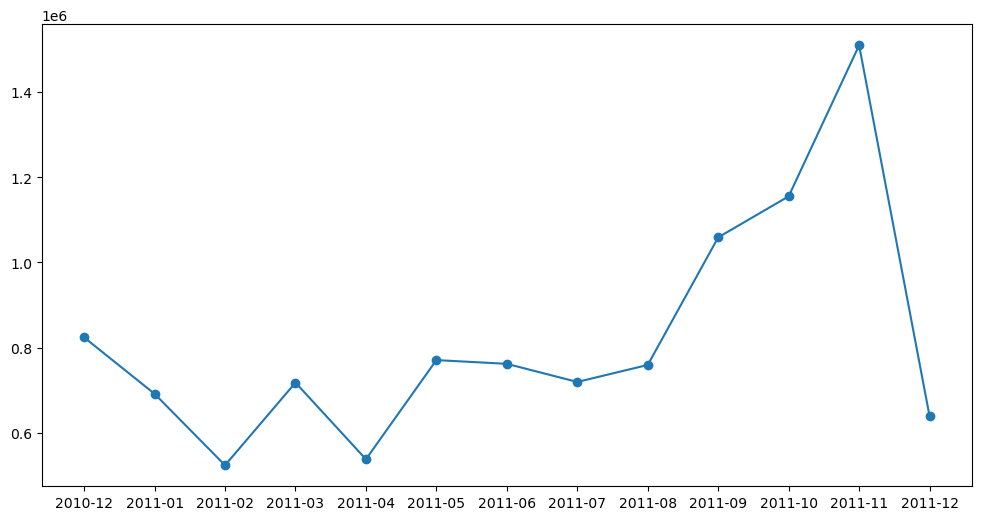

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(Monthly_Revenue.index, Monthly_Revenue.values, marker='o')
plt.show()


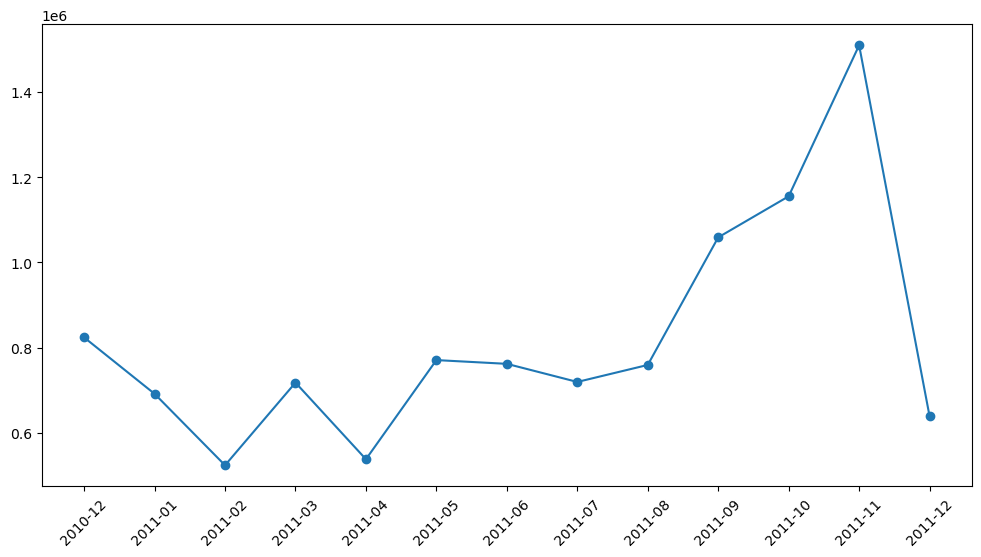

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(Monthly_Revenue.index, Monthly_Revenue.values, marker='o')
plt.xticks(rotation=45)
plt.show()


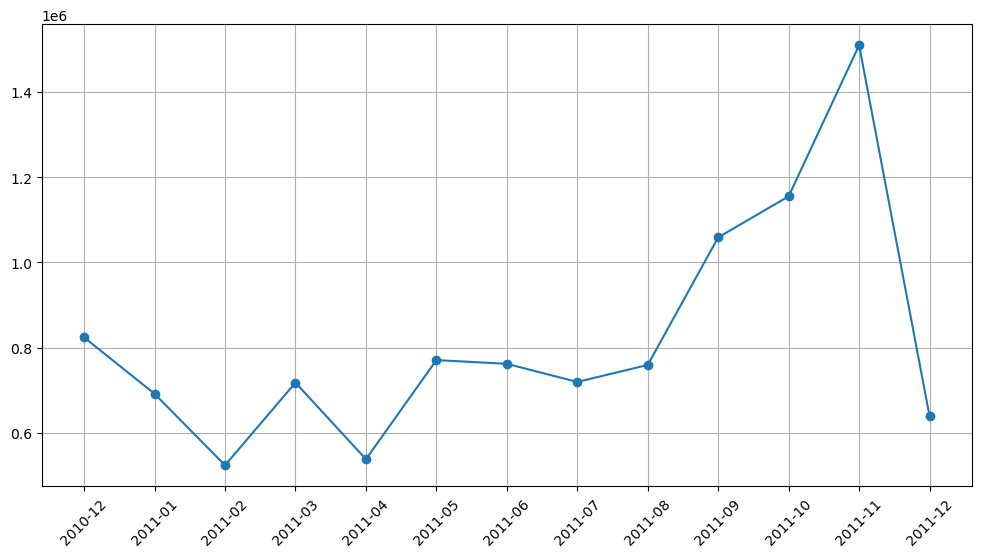

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(Monthly_Revenue.index, Monthly_Revenue.values, marker='o')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


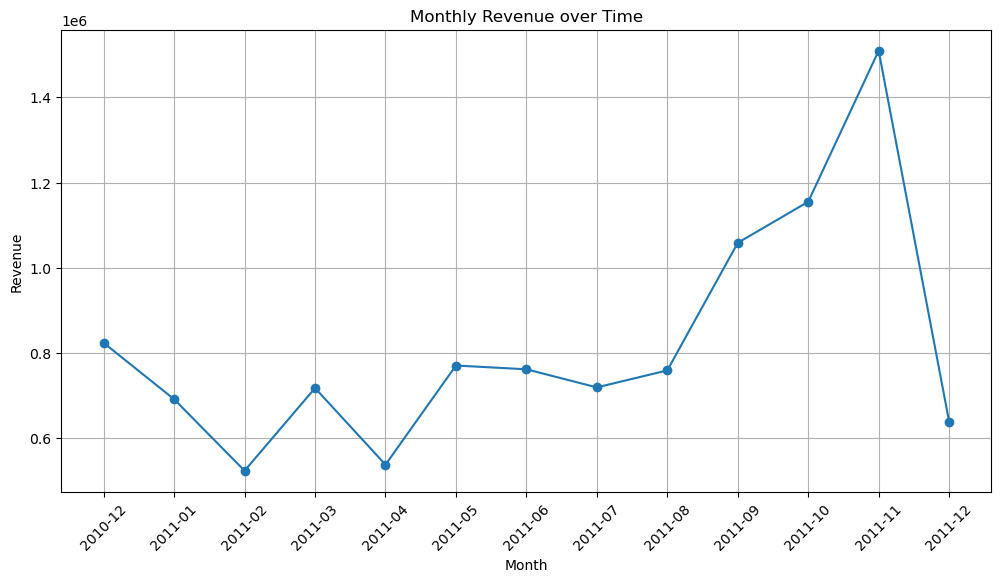

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(Monthly_Revenue.index, Monthly_Revenue.values, marker='o')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue over Time')
plt.show()


In [45]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


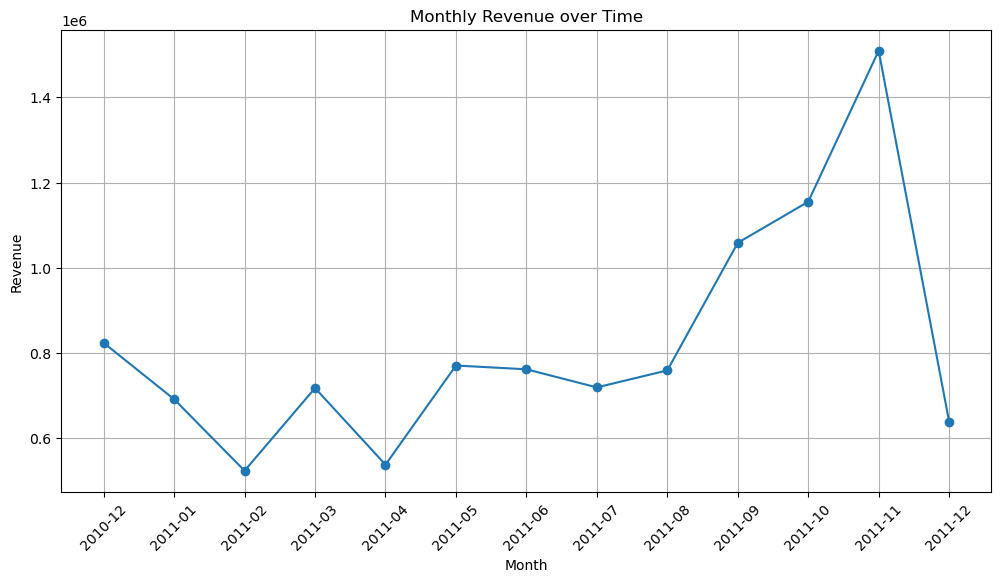

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(Monthly_Revenue.index, Monthly_Revenue.values, marker='o')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue over Time')
plt.savefig("Monthly_Revenue", dpi=600)

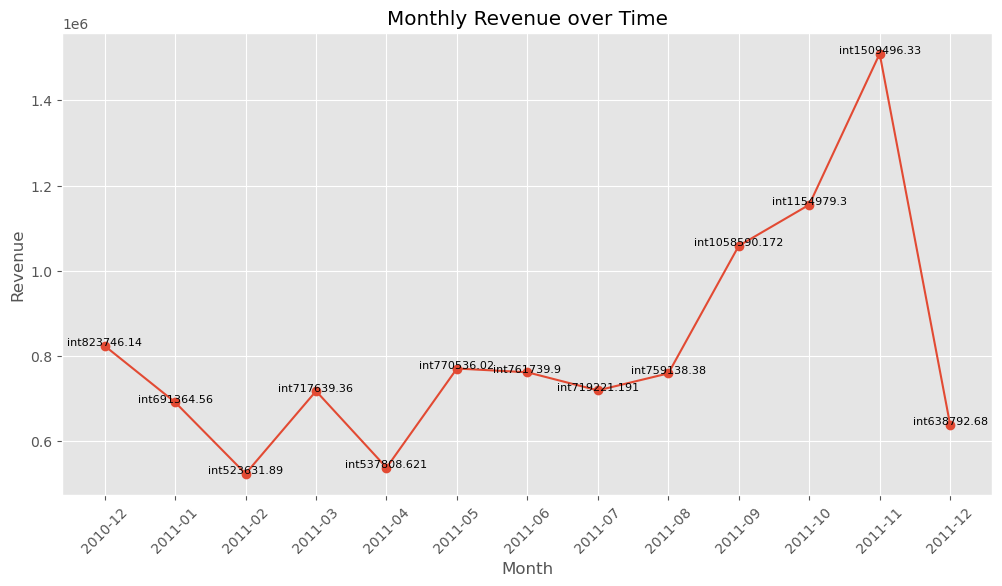

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(Monthly_Revenue.index, Monthly_Revenue.values, marker='o')
plt.xticks(rotation=45)
plt.grid(True)
plt.style.use('ggplot')

for i, value in enumerate(Monthly_Revenue.values):
    plt.text(Monthly_Revenue.index[i], value, f"int{value}", ha='center', fontsize=8)

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue over Time')
plt.show()

In [52]:
#Show top 10 Revenue Gen Countries